## EDA understanding of your dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/taxi_trip_pricing.csv")
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [5]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [6]:
df.shape

(1000, 11)

In [7]:
df.isna().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

## Choices of my features and label for the ML model

In [8]:
selected_cols = [
    "Trip_Distance_km",
    "Trip_Duration_Minutes",
    "Time_of_Day",
    "Passenger_Count",
    "Trip_Price"

]

df_cleaned = df[selected_cols]

## EDA on the new data with graph display

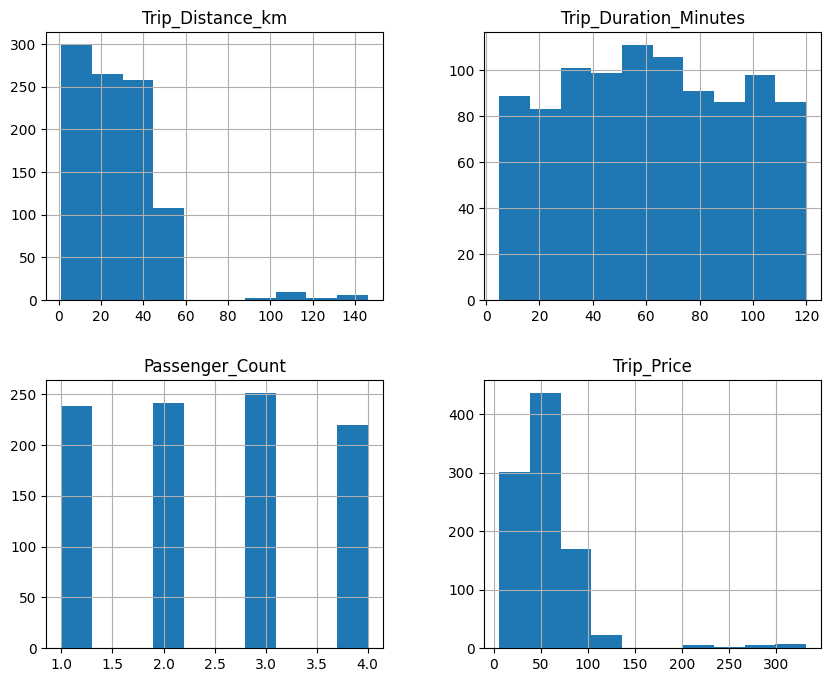

In [9]:
df_cleaned.hist(figsize=(10,8))
plt.show()

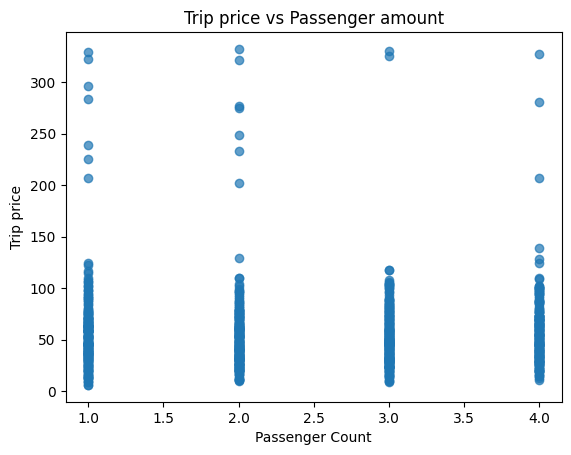

In [10]:
plt.figure()
plt.scatter(df_cleaned["Passenger_Count"], df_cleaned["Trip_Price"], alpha=0.7)
plt.title("Trip price vs Passenger amount")
plt.xlabel("Passenger Count")
plt.ylabel("Trip price")
plt.show()

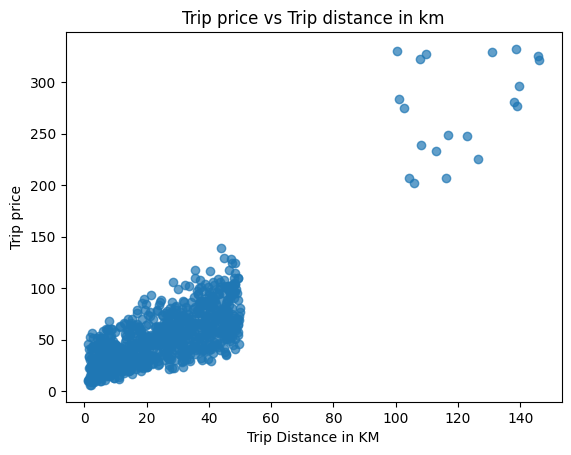

In [11]:
plt.figure()
plt.scatter(df_cleaned["Trip_Distance_km"], df_cleaned["Trip_Price"], alpha=0.7)
plt.title("Trip price vs Trip distance in km")
plt.xlabel("Trip Distance in KM")
plt.ylabel("Trip price")
plt.show()

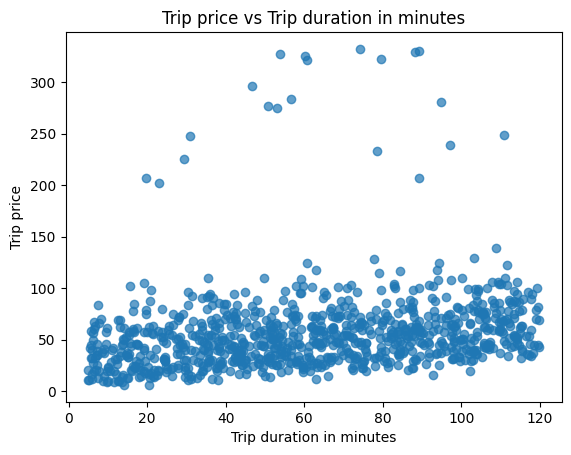

In [12]:
plt.figure()
plt.scatter(df_cleaned["Trip_Duration_Minutes"], df_cleaned["Trip_Price"], alpha=0.7)
plt.title("Trip price vs Trip duration in minutes")
plt.xlabel("Trip duration in minutes")
plt.ylabel("Trip price")
plt.show()

## NaN values data analysis

## Label missing = Trip_Price

- Label = my prediction(Trip_Price)
- Label missing = Trip_Price is null
- These rows should be seperated but not thrown
- Will be saved for predictions


In [13]:
df_no_label = df_cleaned[df_cleaned["Trip_Price"].isna()].copy
df_with_label = df_cleaned[df_cleaned["Trip_Price"].notna()].copy()

## Nulls in features
 
 Numerical features: 

 - Trip_Distance_km
 - Trip_Duration_Minutes
 - Passenger count

## Categorical Feature

- Replace with the most frequent value due low categorical amount

In [14]:
num_cols = ["Trip_Distance_km", "Trip_Duration_Minutes", "Passenger_Count"]

for col in num_cols:
    df_with_label[col] = df_with_label[col].fillna(df_with_label[col].median())

df_with_label["Time_of_Day"] = df_with_label["Time_of_Day"].fillna(
    df_with_label["Time_of_Day"].mode(dropna=True)[0]
)

## Outlier

- Focus Label



<function matplotlib.pyplot.show(close=None, block=None)>

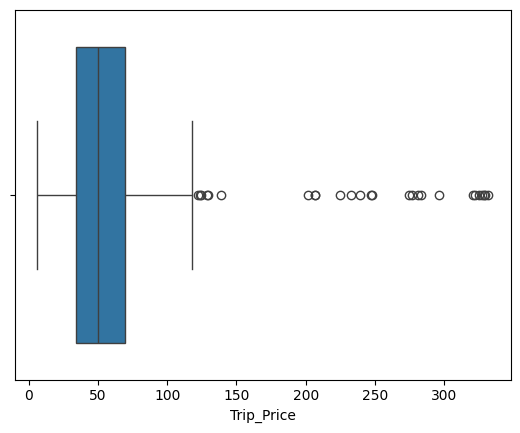

In [15]:
sns.boxplot(x= df_with_label["Trip_Price"])
plt.show

## Decision
- takes away neg prices
- takes away high prices(ex. > 500)

In [16]:
df_with_label = df_with_label[
    (df_with_label["Trip_Price"] > 0) &
    (df_with_label["Trip_Price"] < 500)
]

In [17]:
df_with_label.info()
df_with_label.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       951 non-null    float64
 1   Trip_Duration_Minutes  951 non-null    float64
 2   Time_of_Day            951 non-null    object 
 3   Passenger_Count        951 non-null    float64
 4   Trip_Price             951 non-null    float64
dtypes: float64(4), object(1)
memory usage: 44.6+ KB


Trip_Distance_km         0
Trip_Duration_Minutes    0
Time_of_Day              0
Passenger_Count          0
Trip_Price               0
dtype: int64

## Exporting cleaned data

In [23]:
df_with_label.to_csv("taxi_cleaned_training_data.csv", index=False)


df_no_label.to_csv("taxi_prediction_inputs.csv", index=False)


AttributeError: 'function' object has no attribute 'to_csv'

AttributeError: 'function' object has no attribute 'to_csv'